In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import average_precision_score

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(1);

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
torch.cuda.is_available()

True

## Read data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
arr_W_results = []

In [7]:
import os
SEQ_LEN = 64
IM_SIZE = 28

seq_name = "5in6"
seq_classes = ["different", "observable", "similar"]
seq_class = "similar"

W_PARAM = 8

In [ ]:
# def read_img_sequences(path_to_folder, size=500):
#     curr_size = 0
#     data = []
#     labels = []
    
#     for sequence_folder in os.listdir(path_to_folder):
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN
        
#         for img_path in os.listdir(full_sequence_folder):
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)

#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector
#             img = torch.load(full_path_to_img).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_img[im_index] = img
#             sequence_labels[im_index] = label
#         data.append(sequence_img)
#         labels.append(sequence_labels)
#         if curr_size ==  size:
#             break
#     return data, labels

In [8]:
import time
# if torch.cuda.is_available():
#     map_location=lambda storage, loc: storage.cuda()
# else:
#     map_location='cpu'

**старая версия считывания**


In [ ]:
# anomaly_data = []
# anomaly_labels = []

# def read_img_sequences_anomaly(path_to_folder, size=3):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
        
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()

#             start_time_real = time.time()
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             print (time.time() - start_time_real, "Real seconds")

#             sequence_labels[im_index] = label

#         anomaly_data.append(sequence_img)
#         anomaly_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
        
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_anomaly('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/')

In [ ]:
# normal_data = []
# normal_labels = []

# def read_img_sequences_normal(path_to_folder, size=200):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
#         start_time_real = time.time()
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
            
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_labels[im_index] = label

#         normal_data.append(sequence_img)
#         normal_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
#         print (time.time() - start_time_real, "Real seconds")
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_normal('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_normal/')

In [ ]:
# cd "/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/"

In [ ]:
# pwd

In [ ]:
#anomaly_data, anomaly_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_anomaly/')


In [ ]:
#normal_data, normal_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_normal/')

**New csv method for download**

In [9]:
import csv
from numpy import genfromtxt

In [14]:
anomaly_data_csv = []
anomaly_labels_csv = []

def read_img_sequences_anomaly_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()

            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        anomaly_data_csv.append(sequence_img)
        anomaly_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_anomaly_csv("/content/drive/My Drive/CPDnumbersCSV/" + seq_class + "/num" + seq_name + "/img_ts_anomaly/")


['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2.13419e-07
2
4.4723286e-08
3
4.8582148e-08
4
9.657905e-07
5
2.0969988e-07
6
4.2291363e-06
7
9.5999184e-08
8
1.7969525e-07
9
3.8067522e-08
10
3.115719e-06
11
1.2076595e-08
12
1.5839836e-06
13
9.0344905e-08
14
5.1668106e-08
15
2.2941529e-06
16
3.4407356e-07
17
1.1158851e-07
18
2.5869693e-07
19
2.961258e-07
20
1.4792992e-06
21
4.3889477e-07
22
1.2199021e-07
23
6.526204e-08
24
3.948398e-07
25


KeyboardInterrupt: ignored

In [ ]:
normal_data_csv = []
normal_labels_csv = []

def read_img_sequences_normal_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()


            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        normal_data_csv.append(sequence_img)
        normal_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_normal_csv("/content/drive/My Drive/CPDnumbersCSV/" + seq_class + "/num" + seq_name + "/img_ts_normal/")

['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

0

In [ ]:
all_data = np.vstack((anomaly_data_csv, normal_data_csv))
all_labels = np.vstack((anomaly_labels_csv, normal_labels_csv))
#all_labels = (all_labels == 1).astype(int) # old_version
all_labels = (all_labels == int(seq_name[3])).astype(int)


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, 
                                                                    test_size=0.4, shuffle=True,
                                                                    random_state=42)

test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, 
                                                                test_size=0.5, shuffle=True,
                                                                random_state=42)

## Loss function

In [ ]:
device = torch.device('cuda')

In [ ]:
def loss_delay_detection_2(p_slice):
    n = p_slice.size(0)
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    prod[1:] -= p_slice[:-1]
    cumprod = torch.cumprod(prod, dim=0).to(device)
    loss = torch.arange(1, n + 1).to(device) * p_slice * cumprod
    loss = torch.sum(loss)
    return loss


def loss_delay_detection(p_slice, w):
    n = p_slice.size(0) 
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    
    prod[1:] -= p_slice[:-1].to(device)
    cumprod = torch.cumprod(prod, dim=0).to(device)
    # TODO drop either n or w
    loss = (torch.arange(1, n + 1).to(device) * p_slice * cumprod 
            + (w + 1) * torch.prod(prod[1:]) * (1 - p_slice[-1]))
    loss = torch.sum(loss)
    return loss

def loss_false_alarms(p_slice):
    length = len(p_slice)
    loss = 0
    
    start_ind = 0
    end_ind = 0
    
    while end_ind < length:
        start_ind = end_ind - 1
        if start_ind < 0:
            start_ind = 0
        end_ind = np.random.randint(start_ind, length + 2)
        if end_ind == start_ind:
            end_ind = end_ind + 1
        loss += 1 - loss_delay_detection_2(p_slice[start_ind: end_ind + 1])    
    #loss += 1 - loss_delay_detection_2(p_slice[start_ind: length])            
    loss = torch.sum(loss)
    return loss

In [ ]:
loss_delay_detection(torch.Tensor([0.9, 0.1, 0.3]), 3)

tensor(1.7570, device='cuda:0')

In [ ]:
class CustomLoss(nn.Module):
    
    def __init__(self):
        super(CustomLoss, self).__init__()
        
    def forward(self, outputs, labels):
        loss = torch.zeros(labels.size(0))
        for i, label in enumerate(labels):
            ind = torch.where(label != label[0])[0]
            if ind.size()[0] == 0:
                loss[i] = loss_false_alarms(outputs[i, :])
            else:
                w = W_PARAM
                alpha = 0.5
                loss[i] = (alpha * loss_delay_detection(outputs[i, ind[0]:(ind[0] + w)], w) + 
                           (1 - alpha) * loss_false_alarms(outputs[i, :ind[0]]))
        loss = torch.mean(loss)
        return loss

In [ ]:
# input data parameters
input_size = IM_SIZE * IM_SIZE
output_size = SEQ_LEN
seq_len = SEQ_LEN

# model hyperparameters
hidden_dim = 100
n_layers = 2
num_workers = 1
learning_rate = 1e-3

batch_size = 64

In [ ]:
def prepare_loader(data, labels, seq_len, input_size, batch_size, shuffle=True, num_workers=1):
    data = torch.FloatTensor(data)
    labels = torch.FloatTensor(labels)
    data = data.view(-1, seq_len, input_size)
    labels = labels.view(-1, seq_len)

    all_data = TensorDataset(data, labels) 
    data_loader = DataLoader(all_data, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    
    return data_loader

In [ ]:
train_loader = prepare_loader(train_data, train_labels, seq_len, input_size, batch_size)
val_loader = prepare_loader(val_data, val_labels, seq_len, input_size, batch_size)
test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## LSTM Model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq, hidden)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(lstm_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(GRU, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.gru = nn.GRU(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        #print(hidden[0].shape)
        gru_out, hidden = self.gru(input_seq, hidden)
        #print(gru_out, hidden)  
        gru_out = gru_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(gru_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        # hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        #           weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)

        return hidden

In [ ]:
class CustomLoss(nn.Module):
    
    def __init__(self, w_param):
        super(CustomLoss, self).__init__()
        self.w = w_param
        
    def forward(self, outputs, labels):
        loss = torch.zeros(labels.size(0))
        for i, label in enumerate(labels):
            ind = torch.where(label != label[0])[0]
            if ind.size()[0] == 0:
                loss[i] = loss_false_alarms(outputs[i, :])
            else:
                w = W_PARAM
                alpha = 0.5
                loss[i] = (alpha * loss_delay_detection(outputs[i, ind[0]:(ind[0] + w)], w) + 
                           (1 - alpha) * loss_false_alarms(outputs[i, :ind[0]]))
        loss = torch.mean(loss)
        return loss

LSTM(
  (lstm): LSTM(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

## Save all models


## Calculate metrics for different models

In [ ]:
def evaluate_metrics(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = real_change_index.item()
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

def evaluate_metrics_new(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = seq_len
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

In [ ]:
def get_quality_metrics(test_loader, model, threshold=0.5, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            #test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]

        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            
            # torch.rand_like
            curr_fp, curr_fn, curr_delay, curr_fp_delay, curr_accuracy = evaluate_metrics(curr_labels, curr_predictions, 
                                                                           threshold)

            max_difference = np.abs((curr_labels.max() - curr_labels.min()).item())
            if max_difference: 
                delay_list.append(curr_delay)
            positive_number += (max_difference > 0)
            negative_number += 1 - (max_difference > 0)

            fp_list.append(curr_fp)
            fn_list.append(curr_fn)
            fp_delay_list.append(curr_fp_delay)
            accuracy_list.append(curr_accuracy)

        test_acc_list.append(np.mean(accuracy_list[-test_batch_size:]))
        
    return (positive_number, negative_number, np.mean(test_loss_list), np.mean(test_acc_list), np.mean(delay_list),
            np.mean(fp_delay_list), np.sum(fp_list), np.sum(fn_list))

In [ ]:
def get_pareto_metrics_for_threshold(model, test_loader, threshold_list, LSTM_flag=True):
    fp_number_list = []
    fn_number_list = []
    delay_list = []
    fp_delay_list = []
    for threshold in threshold_list:
        # test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

        (positive_number, negative_number, test_loss, 
         test_acc, mean_delay, mean_fp_delay, fp_number, fn_number) = get_quality_metrics(test_loader, model, threshold, LSTM_flag)

        fp_number_list.append(fp_number)
        fn_number_list.append(fn_number)
        delay_list.append(mean_delay)
        fp_delay_list.append(mean_fp_delay)
        #print(threshold, fp_number, fn_number, mean_delay, mean_fp_delay)
    
    return fp_number_list, fn_number_list, delay_list, fp_delay_list


In [ ]:
def tpr_fpr_for_threshold(model, test_loader, threshold_list, LSTM_flag=True):
  tpr_list = []
  fpr_list = []
  for threshold in threshold_list:
    true_positive, true_negative, false_positive, false_negative, _, _, _, _, _ = get_quality_metrics_for_results(test_loader, model, threshold, LSTM_flag)

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (true_negative + false_positive)

    tpr_list.append(tpr)
    fpr_list.append(fpr)

  return tpr_list, fpr_list


In [ ]:
def get_quality_metrics_for_results(model, test_loader, threshold, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []
    
    def weird_division(n, d):
      return n / d if d else 0

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]
        
        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            true_positive_cur, true_negative_cur, false_positive_cur, false_negative_cur = evaluate_metrics(
                curr_labels, curr_predictions, threshold, is_for_results = True)
        
            true_positive += true_positive_cur
            true_negative += true_negative_cur
            false_positive += false_positive_cur
            false_negative += false_negative_cur


    accuracy = true_positive + true_negative / (true_positive + true_negative + false_positive + false_negative)
    precision = weird_division(true_positive , (true_positive + false_positive))
    print("Metrics", true_positive, true_negative, false_positive, false_negative, threshold)
    recall = weird_division(true_positive, (true_positive + false_negative))
    f1_score = 2 * weird_division((recall * precision), (recall + precision))
    spec = weird_division(true_negative, ( false_positive + true_negative ))
    g_mean = np.sqrt(recall + spec)

    return true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean


In [ ]:
def train_model(model, loss_function, epochs=100, print_every=5, LSTM_flag = True):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    
    valid_loss_min = np.Inf

    loss_list = []
    acc_list = []
    overall_val_loss_list = []
    counter = 0
    model.train()

    out_list = []
    labels_list = []

    model.train()
    for i in range(epochs):
        # for inputs, labels in tqdm(train_loader):
        for inputs, labels in train_loader:
            if inputs.shape[0] < batch_size:
                break

            counter += 1
            inputs, labels = inputs.to(device), labels.to(device)  

            if LSTM_flag:
                h = model.init_hidden(batch_size)
                #print(h.shape)
                #h = tuple([e.data for e in h])
                
                output, h = model(inputs, h)
            else:
                output = model(inputs)

            loss = loss_function(output.squeeze(), labels.float())
            loss_list += [loss.cpu().clone().detach()]
            accuracy = ((output > 0.5).long()) == labels
            acc_list += [accuracy.cpu().detach().float().mean()] # += []
            out_list.append(output.cpu().detach().float())
            labels_list.append(labels.cpu().detach().float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if counter%print_every == 0:
                val_losses = []
                val_outputs = []
                model.eval()
                for val_inputs, val_labels in val_loader:
                    if val_inputs.shape[0] < batch_size:
                        break
                    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

                    if LSTM_flag:
                        val_h = model.init_hidden(batch_size)
                        #val_h = tuple([each.data for each in val_h])
                        val_out, val_h = model(val_inputs, val_h)
                    else:
                        val_out = model(val_inputs)
                        
                    val_loss = loss_function(val_out.squeeze(), val_labels.float())
                    val_losses.append(val_loss.item())
                    val_outputs += [val_out.cpu().clone().detach()]

                val_outputs_one = torch.cat(val_outputs, 0)

                overall_val_loss_list.append(np.mean(val_losses))

                model.train()
                print("Epoch: {}/{}...".format(i+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))
    return model, (loss_list, acc_list, overall_val_loss_list)

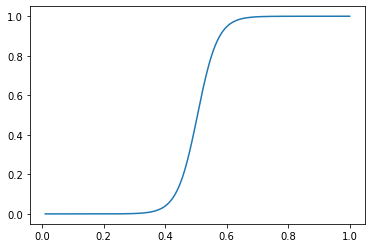

In [ ]:
threshold_number = 200
threshold_list = np.linspace(-15, 15, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
plt.plot(np.linspace(0.01, 1, threshold_number), threshold_list)

In [ ]:
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

tpr_fpr_for_threshold(model, final_test_loader, threshold_list, LSTM_flag=True):

In [ ]:
w_param_arr = [8, 16, 24, 32, 40, 48, 56, 64]

In [ ]:
test_batch_size = 64
for w in w_param_arr:
  device = torch.device("cuda") # changes
  model_LSTM_custom = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
  #model_LSTM_custom = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
  loss_function = CustomLoss(w)
  model_LSTM_custom.to(device)

  model_LSTM_custom, (loss_list, acc_list, 
                    overall_val_loss_list) = train_model(model_LSTM_custom, loss_function, 60, 5, LSTM_flag=True) # was True


  final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

  (fp_number_list_LSTM_custom, fn_number_list_LSTM_custom, 
   delay_list_LSTM_custom, fp_delay_list_LSTM_custom) = get_pareto_metrics_for_threshold(model_LSTM_custom, final_test_loader, 
                                                                                       threshold_list, LSTM_flag=True)
  arr_W_results.append(([delay_list_LSTM_custom, fp_delay_list_LSTM_custom], w))


Epoch: 1/60... Step: 5... Loss: -0.995865... Val Loss: -1.696895
Epoch: 2/60... Step: 10... Loss: -1.910659... Val Loss: -2.159388
Epoch: 2/60... Step: 15... Loss: -3.019568... Val Loss: -3.037124
Epoch: 3/60... Step: 20... Loss: -5.242076... Val Loss: -4.872829
Epoch: 3/60... Step: 25... Loss: -5.054129... Val Loss: -5.828973
Epoch: 4/60... Step: 30... Loss: -6.670424... Val Loss: -5.481997
Epoch: 4/60... Step: 35... Loss: -6.446856... Val Loss: -8.419946
Epoch: 5/60... Step: 40... Loss: -10.767527... Val Loss: -8.725255
Epoch: 5/60... Step: 45... Loss: -9.885482... Val Loss: -7.689255
Epoch: 6/60... Step: 50... Loss: -9.886160... Val Loss: -10.003850
Epoch: 7/60... Step: 55... Loss: -11.678612... Val Loss: -9.429906
Epoch: 7/60... Step: 60... Loss: -11.050068... Val Loss: -8.269097
Epoch: 8/60... Step: 65... Loss: -10.446489... Val Loss: -9.926512
Epoch: 8/60... Step: 70... Loss: -10.490032... Val Loss: -10.421172
Epoch: 9/60... Step: 75... Loss: -11.718081... Val Loss: -11.006760
Ep

In [ ]:
print(len(arr_W_results[0][0]))

2


In [ ]:
print(arr_W_results[0][0])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.010416666666666666, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.0208333333

In [ ]:
np.save('arr_W_results.npy', arr_W_results) # save
#new_num_arr = np.load('data.npy') # load

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


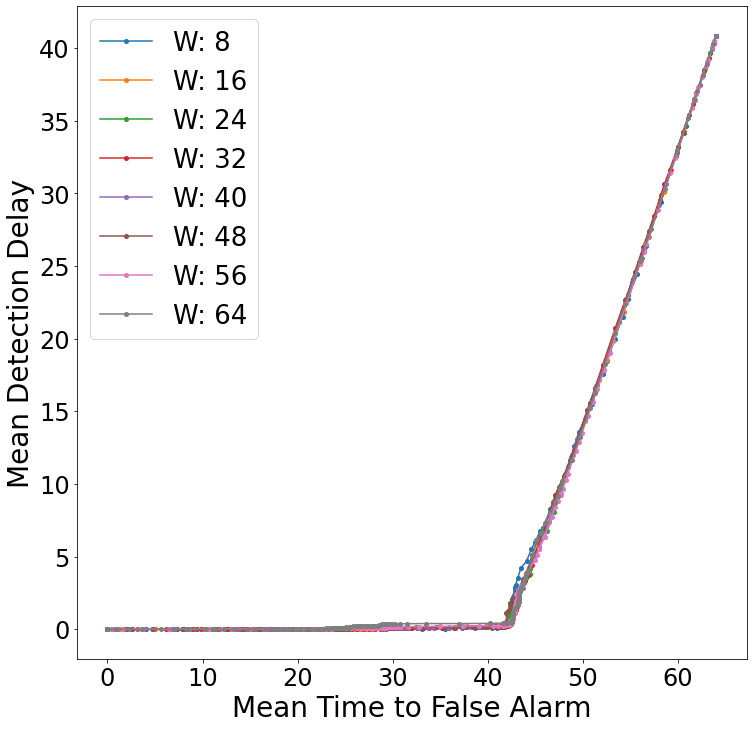

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(arr_W_results[0][0][1], arr_W_results[0][0][0], '-o', markersize=4, label='W: 8')
plt.plot(arr_W_results[1][0][1], arr_W_results[1][0][0], '-o', markersize=4, label='W: 16')
plt.plot(arr_W_results[2][0][1], arr_W_results[2][0][0], '-o', markersize=4, label='W: 24')
plt.plot(arr_W_results[3][0][1], arr_W_results[3][0][0], '-o', markersize=4, label='W: 32')
plt.plot(arr_W_results[4][0][1], arr_W_results[4][0][0], '-o', markersize=4, label='W: 40')
plt.plot(arr_W_results[5][0][1], arr_W_results[5][0][0], '-o', markersize=4, label='W: 48')
plt.plot(arr_W_results[6][0][1], arr_W_results[6][0][0], '-o', markersize=4, label='W: 56')
plt.plot(arr_W_results[7][0][1], arr_W_results[7][0][0], '-o', markersize=4, label='W: 64')

#[8, 16, 24, 32, 40, 48, 56, 64]


plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);
plt.savefig('curve_W.pdf', bbox_inches='tight')

In [ ]:
area_under_graph = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(arr_W_results)):
  area_under_graph[i] = np.trapz(arr_W_results[i][0][0], arr_W_results[i][0][1])

In [ ]:
print(area_under_graph)

[441.78851996527777, 439.54185655381946, 440.4283854166667, 443.8315972222222, 440.63810221354174, 444.63560655381946, 437.7854546440973, 444.5476888020833]


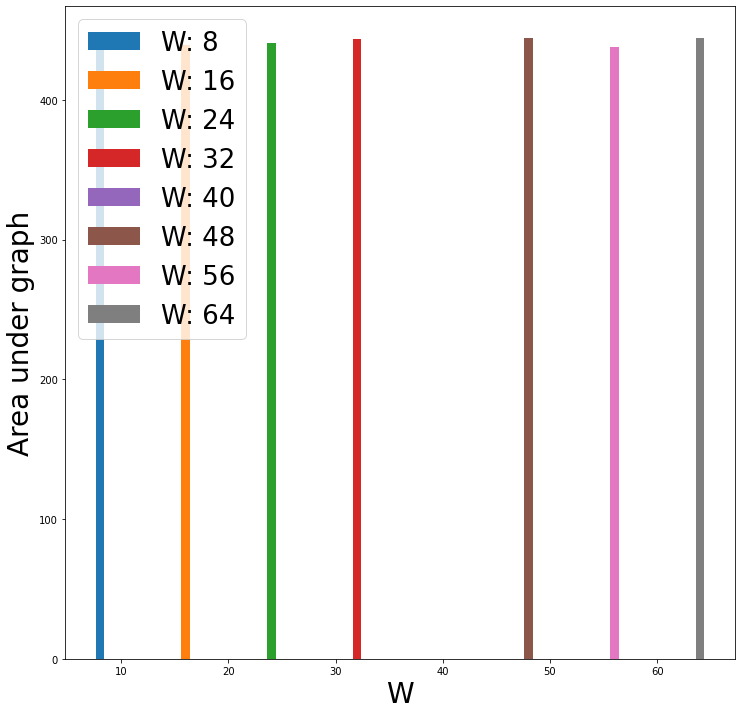

In [ ]:
plt.figure(figsize=(12, 12))
plt.bar(w_param_arr[0], area_under_graph[0], label='W: 8')
plt.bar(w_param_arr[1], area_under_graph[1], label='W: 16')
plt.bar(w_param_arr[2], area_under_graph[2], label='W: 24')
plt.bar(w_param_arr[3], area_under_graph[3], label='W: 32')
plt.bar(w_param_arr[5], area_under_graph[4], label='W: 40')
plt.bar(w_param_arr[5], area_under_graph[5], label='W: 48')
plt.bar(w_param_arr[6], area_under_graph[6], label='W: 56')
plt.bar(w_param_arr[7], area_under_graph[7], label='W: 64')

#[8, 16, 24, 32, 40, 48, 56, 64]

tick_label = ['one', 'two', 'three', 'four', 'five']

plt.xlabel('W', fontsize=28)
plt.ylabel('Area under graph', fontsize=28)
plt.legend(loc='upper left', fontsize=26);
plt.savefig('curve_W.pdf', bbox_inches='tight')


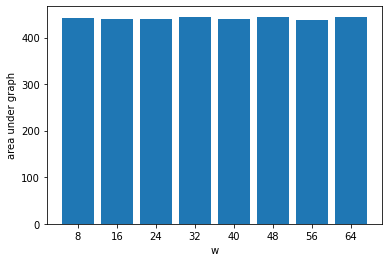

In [ ]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7, 8]
  
# heights of bars
height = [10, 24, 36, 40, 5]
  
# labels for bars
tick_label = ['8', '16', '24', '32', '40', '48', '56', '64']
  
# plotting a bar chart
plt.bar(left, area_under_graph, tick_label = tick_label,
        width = 0.8)
  
# naming the x-axis
plt.xlabel('w')
# naming the y-axis
plt.ylabel('area under graph')
# plot title
plt.savefig('area_under_g.pdf')
# function to show the plot
plt.show()
